In [1]:
import pandas as pd;
import os;
from matplotlib import pyplot as plt

os.getcwd()
os.chdir("/Users/hannahkaufman/Downloads/Data/output");

BRCA.clinical.short.txt ...
gender
female    1096
male        12
Name: patient, dtype: int64
ACC.clinical.short.txt ...
gender
female    48
male      31
Name: patient, dtype: int64
SKCM.clinical.short.txt ...
gender
female    179
male      292
Name: patient, dtype: int64
LAML.clinical.short.txt ...
gender
female    68
male      83
Name: patient, dtype: int64


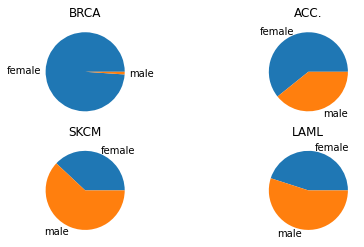

In [2]:
files = os.listdir('./');
fig, axes = plt.subplots(nrows=2, ncols=2);
plt.subplots_adjust(wspace=1)
i=0;
for f in files:
    if (f.endswith('.clinical.short.txt')):
        print(f, '...')
        clinical_short = pd.read_csv(f, sep='\t');
        by_gender = clinical_short.groupby('gender').patient.count();
        print(by_gender);
        ax=axes[i//2, i%2];
        by_gender.plot(kind='pie', ax=ax, title=f[0:4])
        ax.yaxis.label.set_visible(False)
        i = i+1

BRCA.clinical.short.txt ...
count    1092.000000
mean       59.016392
std        13.162861
min        26.600000
25%        49.200000
50%        58.950000
75%        68.000000
max        90.100000
Name: age_at_diagnosis, dtype: float64
ACC.clinical.short.txt ...
count    79.000000
mean     47.269620
std      15.798713
min      14.700000
25%      35.350000
50%      49.900000
75%      60.200000
max      77.500000
Name: age_at_diagnosis, dtype: float64
SKCM.clinical.short.txt ...
count    463.000000
mean      58.730454
std       15.713166
min       15.600000
25%       48.350000
50%       58.700000
75%       71.400000
max       90.100000
Name: age_at_diagnosis, dtype: float64
LAML.clinical.short.txt ...
count    151.000000
mean      54.645695
std       16.058745
min       21.600000
25%       42.600000
50%       56.100000
75%       67.150000
max       88.600000
Name: age_at_diagnosis, dtype: float64


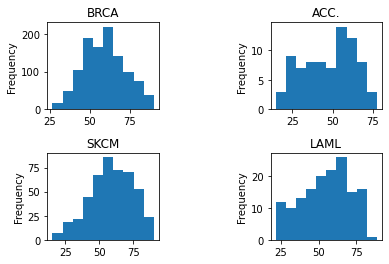

In [3]:
files = os.listdir('./');
fig, axes = plt.subplots(nrows=2, ncols=2);
plt.subplots_adjust(wspace=1, hspace=0.5)
i=0;
files = os.listdir('./');
for f in files:
    if (f.endswith('.clinical.short.txt')):
        print(f, '...')
        clinical_short = pd.read_csv(f, sep='\t');
        summary = clinical_short['age_at_diagnosis'].describe();
        print(summary);
        ax=axes[i//2, i%2]
        clinical_short.age_at_diagnosis.plot(kind='hist', ax=ax, title=f[0:4])
        i = i + 1;

BRCA.clinical.short.txt ...
ACC.clinical.short.txt ...
SKCM.clinical.short.txt ...
LAML.clinical.short.txt ...


Text(0.5, 0.98, '')

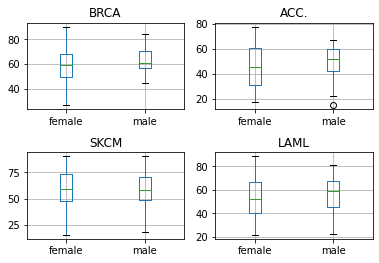

In [4]:
files = os.listdir('./');
fig, axes = plt.subplots(nrows=2, ncols=2);
plt.subplots_adjust(wspace=1, hspace=0.5);
i=0;
files = os.listdir('./');
for f in files:
    if (f.endswith('.clinical.short.txt')):
        print(f, '...')
        clinical_short = pd.read_csv(f, sep='\t');
        ax=axes[i//2, i%2];
        clinical_short[['gender', 'age_at_diagnosis']].boxplot(by='gender', ax=ax)
        ax.title.set_text(f[0:4])   
        ax.xaxis.label.set_visible(False)
        i = i + 1;
plt.suptitle("")

BRCA.clinical.short.txt ...
ACC.clinical.short.txt ...
SKCM.clinical.short.txt ...
LAML.clinical.short.txt ...


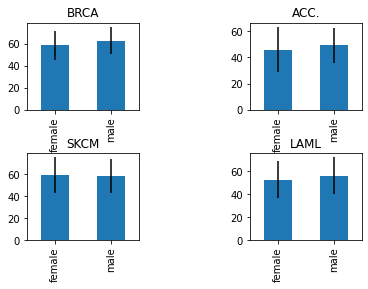

In [5]:
files = os.listdir('./');
fig, axes = plt.subplots(nrows=2, ncols=2);
plt.subplots_adjust(wspace=1, hspace=0.5)
i=0;
files = os.listdir('./');
for f in files:
    if (f.endswith('.clinical.short.txt')):
        print(f, '...')
        clinical_short = pd.read_csv(f, sep='\t');
        m = clinical_short[['age_at_diagnosis', 'gender']].groupby('gender').mean()
        e = clinical_short[['age_at_diagnosis', 'gender']].groupby('gender').std()
        ax = axes[i//2, i%2];
        m.plot(kind='bar', ax=ax, title=f[0:4], yerr=e, legend=False);
        ax.xaxis.label.set_visible(False)
        i = i + 1;

In [6]:
stage_recode = {'not reported':None, 'stage 0':0, 'i/ii nos':None, 'stage i':1, 'stage ia':1, 'stage ib':1, 'stage ii':2, 'stage iia':2, 'stage iib':2, 'stage iic':2, 'stage iii':3, 'stage iiia':3, 'stage iiib':3, 'stage iiic':3, 'stage iv':4, 'stage x':None, '':None, '0':None}

import numpy as np;
files = os.listdir('./');
for f in files:
    if (f.endswith('.clinical.short.txt')):
        print(f, '...')
        clinical_short = pd.read_csv(f, sep='\t');
        clinical_short['tumor_stage_2'] = [stage_recode[t] for t in clinical_short['tumor_stage'].fillna('')]
        f_out = f.replace('short', 'short.stage')
        clinical_short.to_csv(f_out, sep='\t', index=False)

BRCA.clinical.short.txt ...
ACC.clinical.short.txt ...
SKCM.clinical.short.txt ...
LAML.clinical.short.txt ...


BRCA.clinical_somatic.df.pkl ...
count     979.000000
mean       99.042901
std       285.279754
min         2.000000
25%        32.500000
50%        50.000000
75%        87.500000
max      6047.000000
Name: sample_id, dtype: float64
SKCM.clinical_somatic.df.pkl ...
count      465.000000
mean       723.744086
std       1214.520125
min          4.000000
25%        176.000000
50%        405.000000
75%        817.000000
max      18062.000000
Name: sample_id, dtype: float64
ACC.clinical_somatic.df.pkl ...
count      79.000000
mean       74.848101
std       152.257802
min         4.000000
25%        18.000000
50%        29.000000
75%        56.000000
max      1129.000000
Name: sample_id, dtype: float64
LAML.clinical_somatic.df.pkl ...
count     111.000000
mean       60.504505
std       255.525194
min         1.000000
25%         6.500000
50%        13.000000
75%        20.000000
max      1729.000000
Name: sample_id, dtype: float64


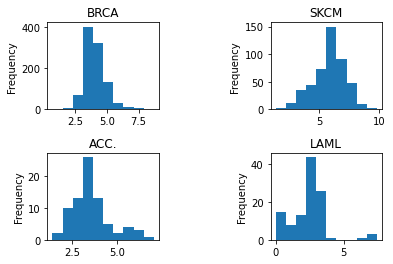

In [7]:
import numpy as np;
import pickle;

fig, axes = plt.subplots(nrows=2, ncols=2);
plt.subplots_adjust(wspace=1, hspace=0.5)
i=0;
files = os.listdir('./');
for f in files:
    if (f.endswith('.clinical_somatic.df.pkl')):
        print(f, '...')
        file = open(f, 'rb')
        somatic_short = pickle.load(file)[0];
        mut_cnt = somatic_short.groupby('sample_id').sample_id.count();
        print(mut_cnt.describe())
        ax = axes[i//2, i%2]
        mut_cnt.apply(np.log).plot(kind='hist', ax=ax, title=f[0:4])
        i = i + 1;

In [8]:
files = os.listdir('./');
for f in files:
    if (f.endswith('.clinical_somatic.df.pkl')):
        print(f, '...')
        file = open(f, 'rb')
        somatic_short = pickle.load(file)[0];
        mut_cnt = somatic_short[['sample_id', 'symbol']].groupby('sample_id').count();
        mut_cnt['patient'] = mut_cnt.index;
        mut_cnt['patient'] = mut_cnt['patient'].str.extract('(TCGA-[\w\d]+-[\w\d]+)-')
        mut_cnt.rename(columns={'symbol':'mut_cnt'}, inplace=True)

        f_clinical = f.replace('clinical_somatic.df.pkl', 'clinical.short.stage.txt')
        clinical_short = pd.read_csv(f_clinical, sep='\t')
        clinical_mut = clinical_short.join(mut_cnt.set_index('patient'), on='patient', how='inner')
        f_out = f.replace('clinical_somatic.df.pkl', 'clinical_mut.txt')
        clinical_mut.to_csv(f_out, sep='\t', index=False)

BRCA.clinical_somatic.df.pkl ...
SKCM.clinical_somatic.df.pkl ...
ACC.clinical_somatic.df.pkl ...
LAML.clinical_somatic.df.pkl ...


BRCA.clinical_mut.txt ...
SKCM.clinical_mut.txt ...
LAML.clinical_mut.txt ...
ACC.clinical_mut.txt ...


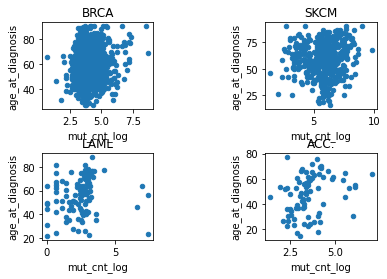

In [10]:
files = os.listdir('./');
fig, axes = plt.subplots(nrows=2, ncols=2);
plt.subplots_adjust(wspace=1, hspace=0.5)
i=0;

files = os.listdir('./');
for f in files:
    if (f.endswith('.clinical_mut.txt')):
        print(f, '...')
        clinical_short = pd.read_csv(f, sep='\t')
        clinical_short['mut_cnt_log'] = clinical_short['mut_cnt'].apply(np.log)
        ax = axes[i//2, i%2]
        clinical_short.plot(kind='scatter', x='mut_cnt_log', y='age_at_diagnosis', ax=ax, title=f[0:4])
        i = i + 1;

BRCA.clinical_mut.txt ...
SKCM.clinical_mut.txt ...
LAML.clinical_mut.txt ...
ACC.clinical_mut.txt ...


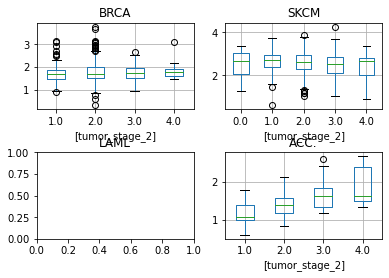

In [11]:
files = os.listdir('./');
fig, axes = plt.subplots(nrows=2, ncols=2);
plt.subplots_adjust(wspace=1, hspace=0.5)
i=0;

files = os.listdir('./');
for f in files:
    if (f.endswith('.clinical_mut.txt')):
        print(f, '...')
        clinical_short = pd.read_csv(f, sep='\t')
        clinical_short['mut_cnt_log'] = clinical_short['mut_cnt'].apply(np.log10, 10)
        ax = axes[i//2, i%2];
        if clinical_short.tumor_stage_2.isna().sum() < clinical_short.shape[0]:
            clinical_short[['tumor_stage_2', 'mut_cnt_log']].boxplot(by='tumor_stage_2', ax=ax)
        ax.title.set_text(f[0:4])   
        i = i + 1;
plt.suptitle('');

BRCA.clinical_mut.txt ...
SKCM.clinical_mut.txt ...
LAML.clinical_mut.txt ...
ACC.clinical_mut.txt ...


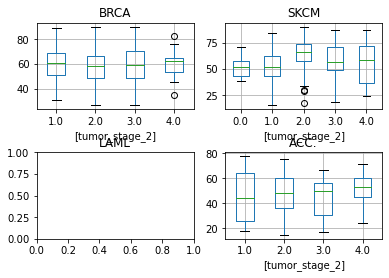

In [12]:
files = os.listdir('./');
fig, axes = plt.subplots(nrows=2, ncols=2);
plt.subplots_adjust(wspace=1, hspace=0.5)
i=0;

files = os.listdir('./');
for f in files:
    if (f.endswith('.clinical_mut.txt')):
        print(f, '...')
        clinical_short = pd.read_csv(f, sep='\t')
        ax = axes[i//2, i%2]
        if clinical_short.tumor_stage_2.isna().sum() < clinical_short.shape[0]:
            clinical_short[['tumor_stage_2', 'age_at_diagnosis']].boxplot(by='tumor_stage_2', ax=ax)
        ax.title.set_text(f[0:4])   
        i = i + 1;
plt.suptitle('');